In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import pickle

In [5]:
#Load the dataset after Bi-directional variable selection
x = pd.read_csv("bi_variable_selection.csv")
y = pd.read_csv("bi_variable_labels.csv")

#Splits the dataset into 70 percent training set and 30 percent testing set
# keeping the random_state value same makes the function to split same rows into training and testing every time
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=30)

In [6]:
from datetime import timedelta
import time

#Time returns the elapsed time in seconds. This function converts that into hours, minutes and seconds
def convert_to_preferred_format(sec):
   sec = sec % (24 * 3600)
   hour = sec // 3600
   sec %= 3600
   min = sec // 60
   sec %= 60
   return "%02d:%02d:%02d" % (hour, min, sec) 
start = time.time()

#Initializes the default Random Forest Regressor
normal_model = RandomForestRegressor()

#Trains the Random Forest Regressor on the training set
normal_model.fit(x_train, y_train.values.ravel())

#Performes predictions on the test set using  trained Random Forest Regressor
normal_predictions = normal_model.predict(x_test)
k=len(list(x_train.columns))
n = len(normal_predictions)
stop = (time.time() - start)

#Calculates and prints the time taken for training the Random Forest Regressor
print('Elapsed Time:', convert_to_preferred_format(stop))
print('======'*5)
print("Before GridSearchCV")
print('======'*5)

#Evaluation metrics for the unoptimized Random Forest Regressor on test set
Metrics={}
Metrics['MSE']=[mean_squared_error(y_test,normal_predictions)]
Metrics['RMSE']=[np.sqrt(mean_squared_error(y_test,normal_predictions))]
Metrics['R2_Score']=[r2_score(y_test,normal_predictions)]
Metrics['Adjusted_R2_score']=[1 - ((1-r2_score(y_test,normal_predictions))*(n-1)/(n-k-1))]
metrics_df = pd.DataFrame(Metrics)
print(metrics_df)
filename = 'randomforest_bi_variable_model.sav'
pickle.dump(normal_model, open(filename, 'wb'))

Elapsed Time: 00:00:18
Before GridSearchCV
        MSE      RMSE  R2_Score  Adjusted_R2_score
0  0.077922  0.279144  0.916056           0.916018


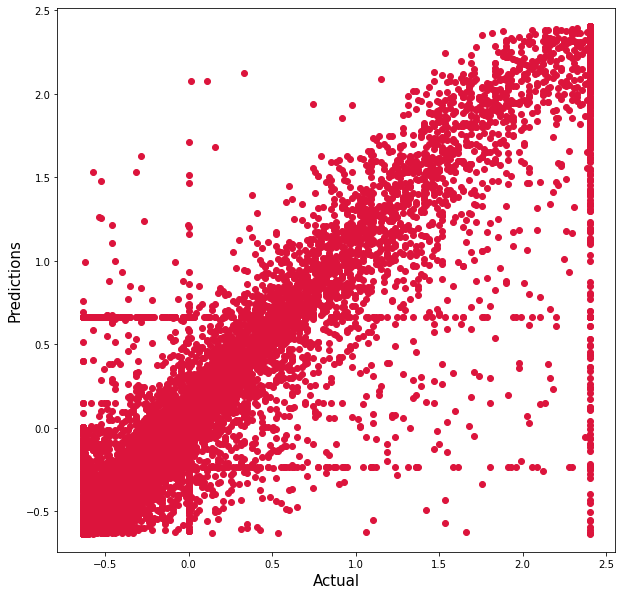

In [7]:
#Plot of actual values versus the predicted values from unoptimized Random Forest Regressor
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(y_test, normal_predictions, c='crimson')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()